In [15]:
# libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import unidecode
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import sys 
sys.path.append("../../functions/")
from correlations import pearsonr_CI, partial_corr
from import_functions import import_gadm
from plot_style import plot_style
colors = plot_style("../../functions/fonts/")
from matplotlib.colors import LinearSegmentedColormap
cmap1 = LinearSegmentedColormap.from_list('mycmap', [colors[0], 'white'])
cmap2 = LinearSegmentedColormap.from_list('mycmap', ['white', colors[1]])

# import data
gadm2_slv = import_gadm("el-salvador", path_to_data="../../../data/")
gadm2_col = import_gadm("colombia", path_to_data="../../../data/")
gadm2_ecu = import_gadm("ecuador", path_to_data="../../../data/")

def plot_regplot(gadm2, x, y, ax, color, xlabel, ylabel):
    gadm2_notnull = gadm2.loc[(gadm2[x].notnull()) & (gadm2[y].notnull())]
    sns.regplot(data=gadm2_notnull, x=x, y=y, ax=ax, color=color, 
                scatter_kws={'edgecolor':  'white', 'linewidth': 0.3, 'alpha': 0.7},
                line_kws={"linewidth": 1.5})
    r, c1, c2 = pearsonr_CI(x=gadm2_notnull[x].values, y=gadm2_notnull[y].values, alpha=0.05)
    
    if y == "mpi":
        ax.annotate(text="$\\rho=$" + str(np.round(r, 2)) + " [" + str(np.round(c1, 2)) + ", " + \
                    str(np.round(c2, 2)) + "]", xy=(0.05, 0.1), xycoords="axes fraction", fontsize=6,
                    bbox=dict(facecolor='none', edgecolor='grey', boxstyle='round,pad=0.25', linewidth=0.3))
    else:
        ax.annotate(text="$\\rho=$" + str(np.round(r, 2)) + " [" + str(np.round(c1, 2)) + ", " + \
                    str(np.round(c2, 2)) + "]", xy=(0.5, 0.1), xycoords="axes fraction", fontsize=6,
                    bbox=dict(facecolor='none', edgecolor='grey', boxstyle='round,pad=0.25', linewidth=0.3))
        
    ax.set_xlabel(xlabel, fontsize=8)
    ax.set_ylabel(ylabel, fontsize=8)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.yaxis.set_major_locator(plt.MaxNLocator(6))
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    ax.tick_params(axis="both", labelsize=8)

# Add MPI to Colombia data

In [16]:
# lower names
gadm2_col["NAME_2"] = [unidecode.unidecode(s.lower()) for s in gadm2_col["NAME_2"]] 

# import mpi
mpi = gpd.read_file("../../../data/colombia/others/MPM/shapefile/MPM_FuenteCensal_2018.shp")
mpi["MPIO_CNMBR"] = [unidecode.unidecode(s.lower()) for s in mpi["MPIO_CNMBR"]]

# do matching
gadm2_col['mpi'] = [mpi.loc[mpi.MPIO_CNMBR == row["NAME_2"]]['MPM'].mean() for index, row in gadm2_col.iterrows()]

# Plot

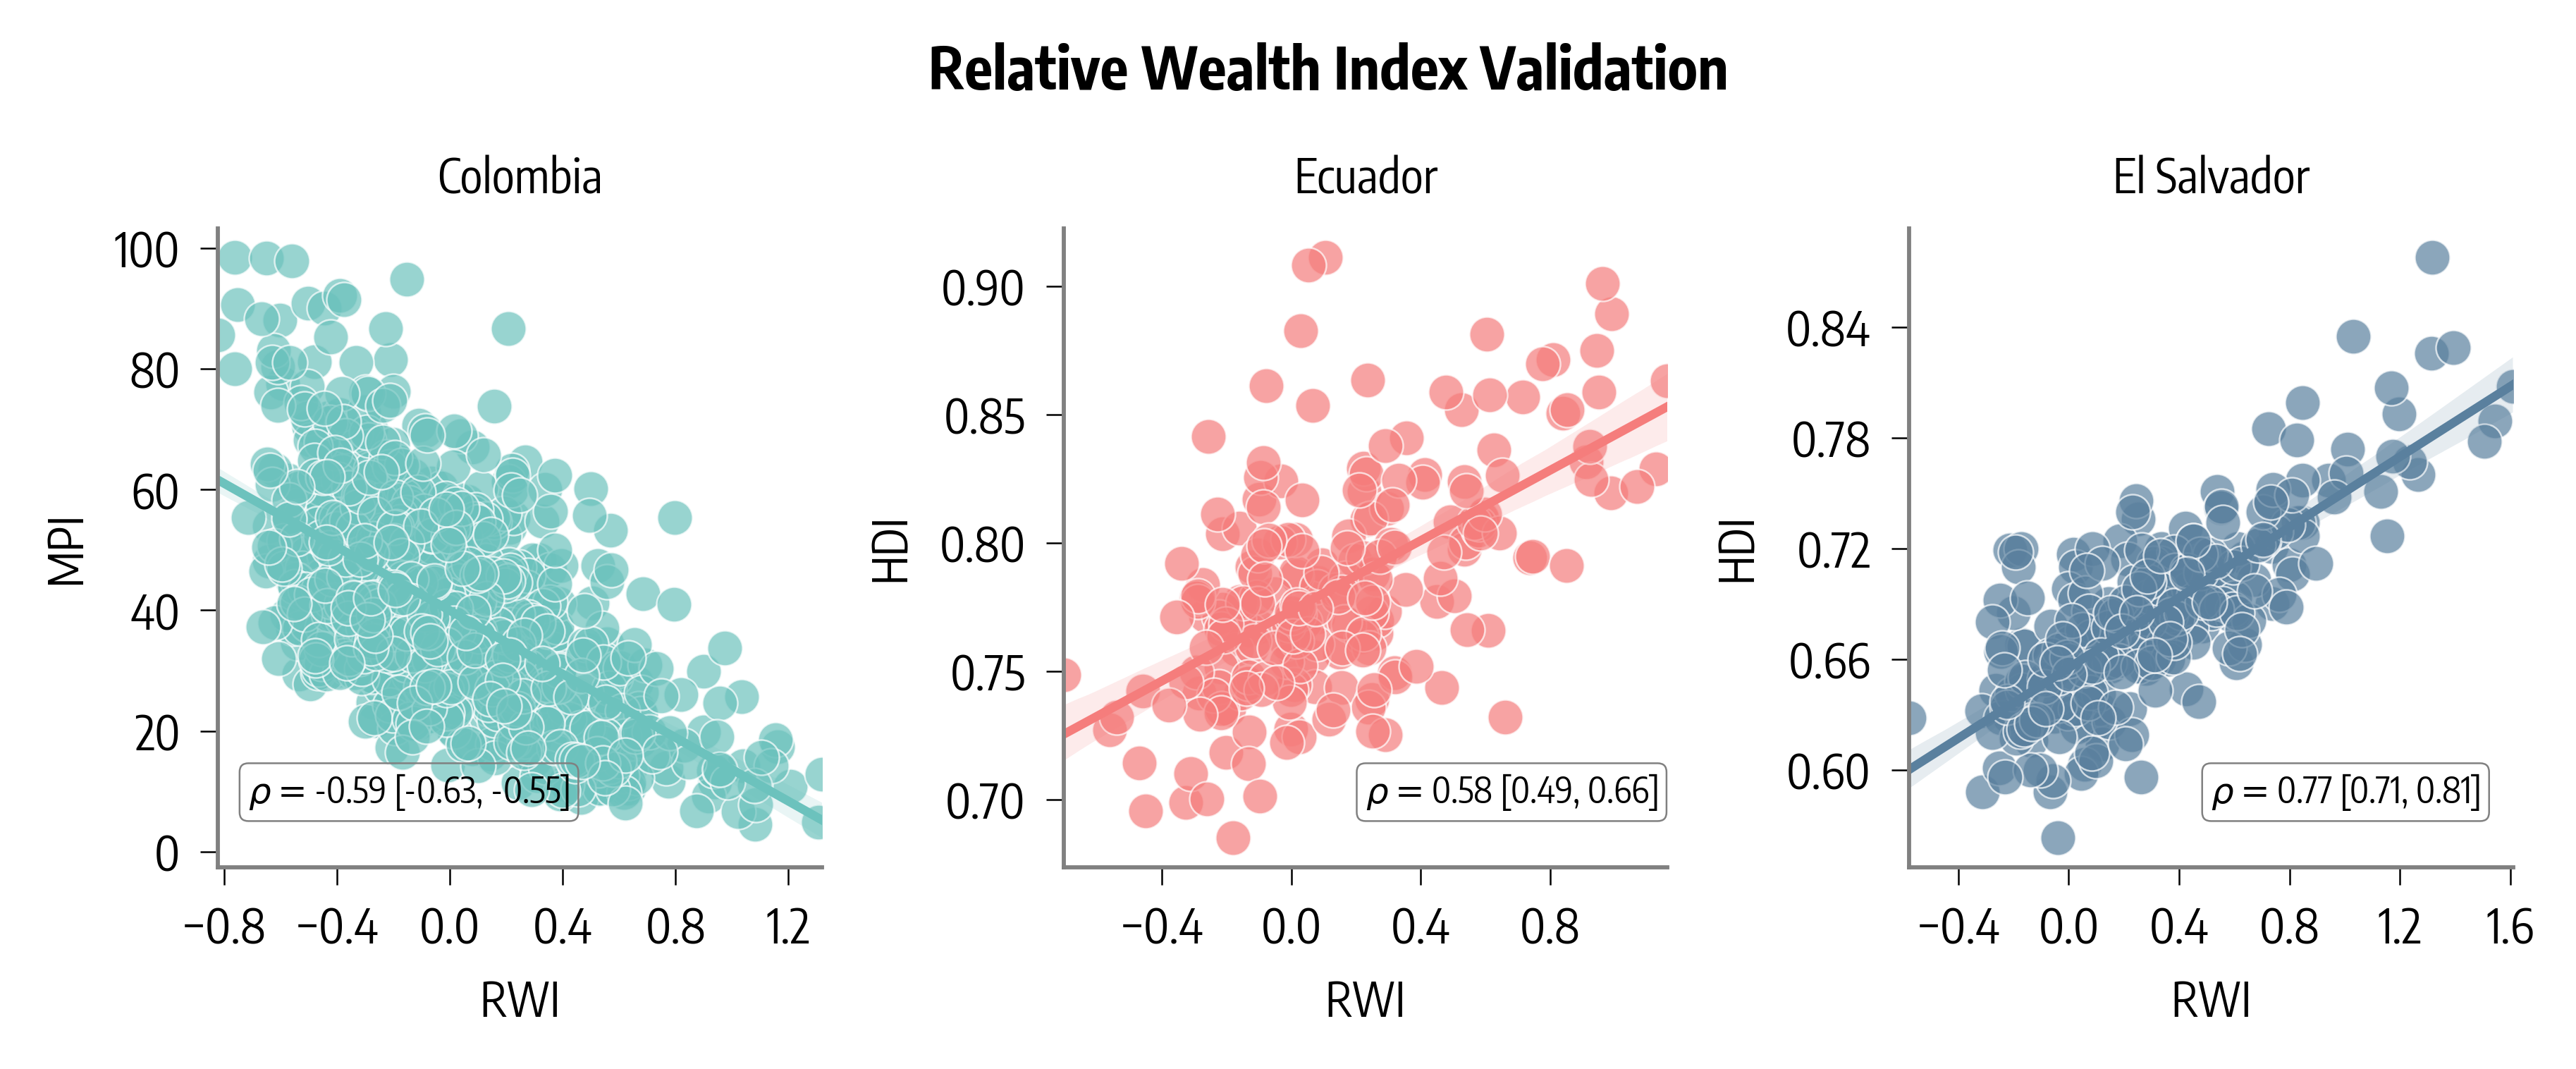

In [18]:
fig, axes = plt.subplots(dpi=600, ncols=3, figsize=(7,2))
plot_regplot(gadm2_col, 'rwi_weight', 'mpi', axes[0], colors[0], 'RWI', 'MPI')
plot_regplot(gadm2_ecu, 'rwi_weight', 'hdi', axes[1], colors[3], 'RWI', 'HDI')
plot_regplot(gadm2_slv, 'rwi_weight', 'hdi', axes[2], colors[1], 'RWI', 'HDI')
axes[0].set_title('Colombia', fontsize=8)
axes[1].set_title('Ecuador', fontsize=8)
axes[2].set_title('El Salvador', fontsize=8)

fig.suptitle("Relative Wealth Index Validation", weight='bold', fontsize=10, y=1.1)
plt.subplots_adjust(wspace=0.4)
plt.savefig("./img/rwi_validation.pdf", bbox_inches='tight')